# Exploratory Data Analysis

***Importing Required Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading csv file
csv_dir = "../input/mobile-price-classification/train.csv"
csv = pd.read_csv(csv_dir)
print("shape of the data : {}".format(csv.shape))
csv.head(10).T #dot T prints the table in a neat manner

shape of the data : (2000, 21)


,0,1,2,3,4,5,6,7,8,9
battery_power,842.0,1021.0,563.0,615.0,1821.0,1859.0,1821.0,1954.0,1445.0,509.0
blue,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2,0.5,1.7,0.5,0.5,0.6
dual_sim,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
fc,1.0,0.0,2.0,0.0,13.0,3.0,4.0,0.0,0.0,2.0
four_g,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0,22.0,10.0,24.0,53.0,9.0
m_dep,0.6,0.7,0.9,0.8,0.6,0.7,0.8,0.8,0.7,0.1
mobile_wt,188.0,136.0,145.0,131.0,141.0,164.0,139.0,187.0,174.0,93.0
n_cores,2.0,3.0,5.0,6.0,2.0,1.0,8.0,4.0,7.0,5.0


In [3]:
#getting information of the csv file
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
#unique values of every column
print(csv.apply(lambda x: len(x.unique())))

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64


In [5]:
#get columns of the csv file
features = csv.columns
features = features.drop("price_range")
print(features)


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


In [6]:
csv.describe() #dot T prints the description in a neat tabular format

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


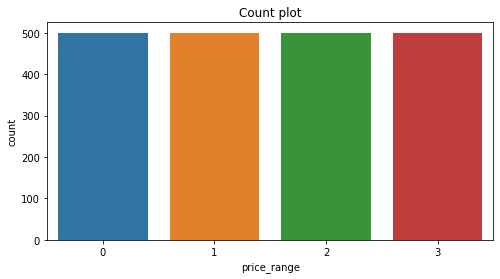

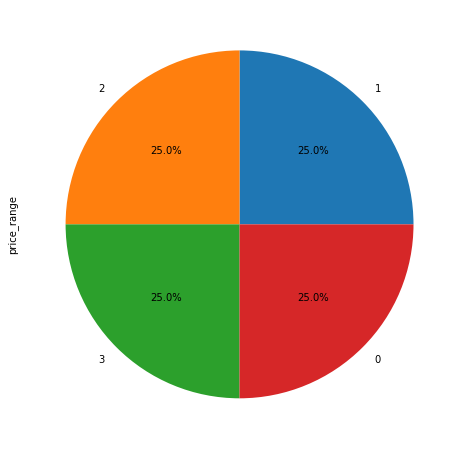

value counts of price_range:
 1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


In [7]:
plt.figure(figsize=(8,4))
plt.title("Count plot")
sns.countplot(x="price_range", data = csv)
plt.show()
csv["price_range"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(8,8))
plt.show()
print("value counts of price_range:\n",csv.price_range.value_counts())

In [8]:
categorical_features = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]
continuous_features = list(csv.columns)
for feature in categorical_features:
    continuous_features.remove(feature)
continuous_features.remove("price_range")
features = categorical_features + continuous_features
print(len(continuous_features), len(categorical_features))
print(len(features))

14 6
20


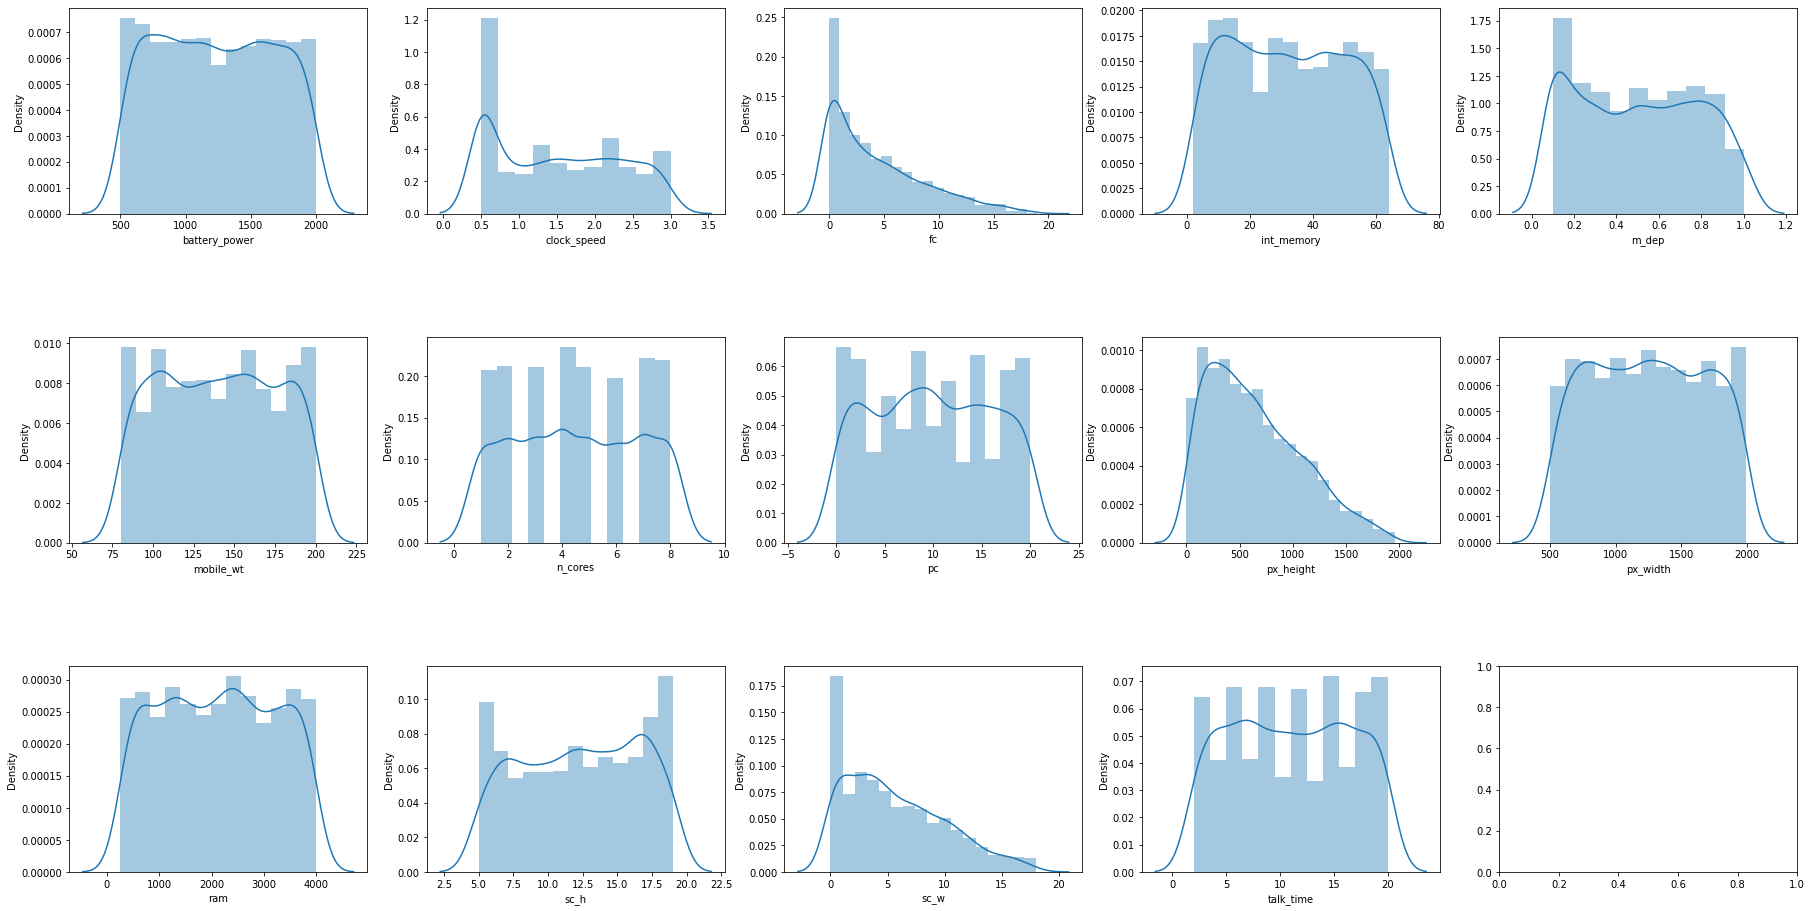

In [9]:
#plotting the distribution using sns
def dist_plots(df, continuous_features):
    fig, ax = plt.subplots(3,5, figsize = (30,15))
    for i,feature in enumerate(continuous_features):
        sns.distplot(df[feature], ax=ax[i//5,i%5])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.6)
    plt.show()
    
dist_plots(csv, continuous_features)

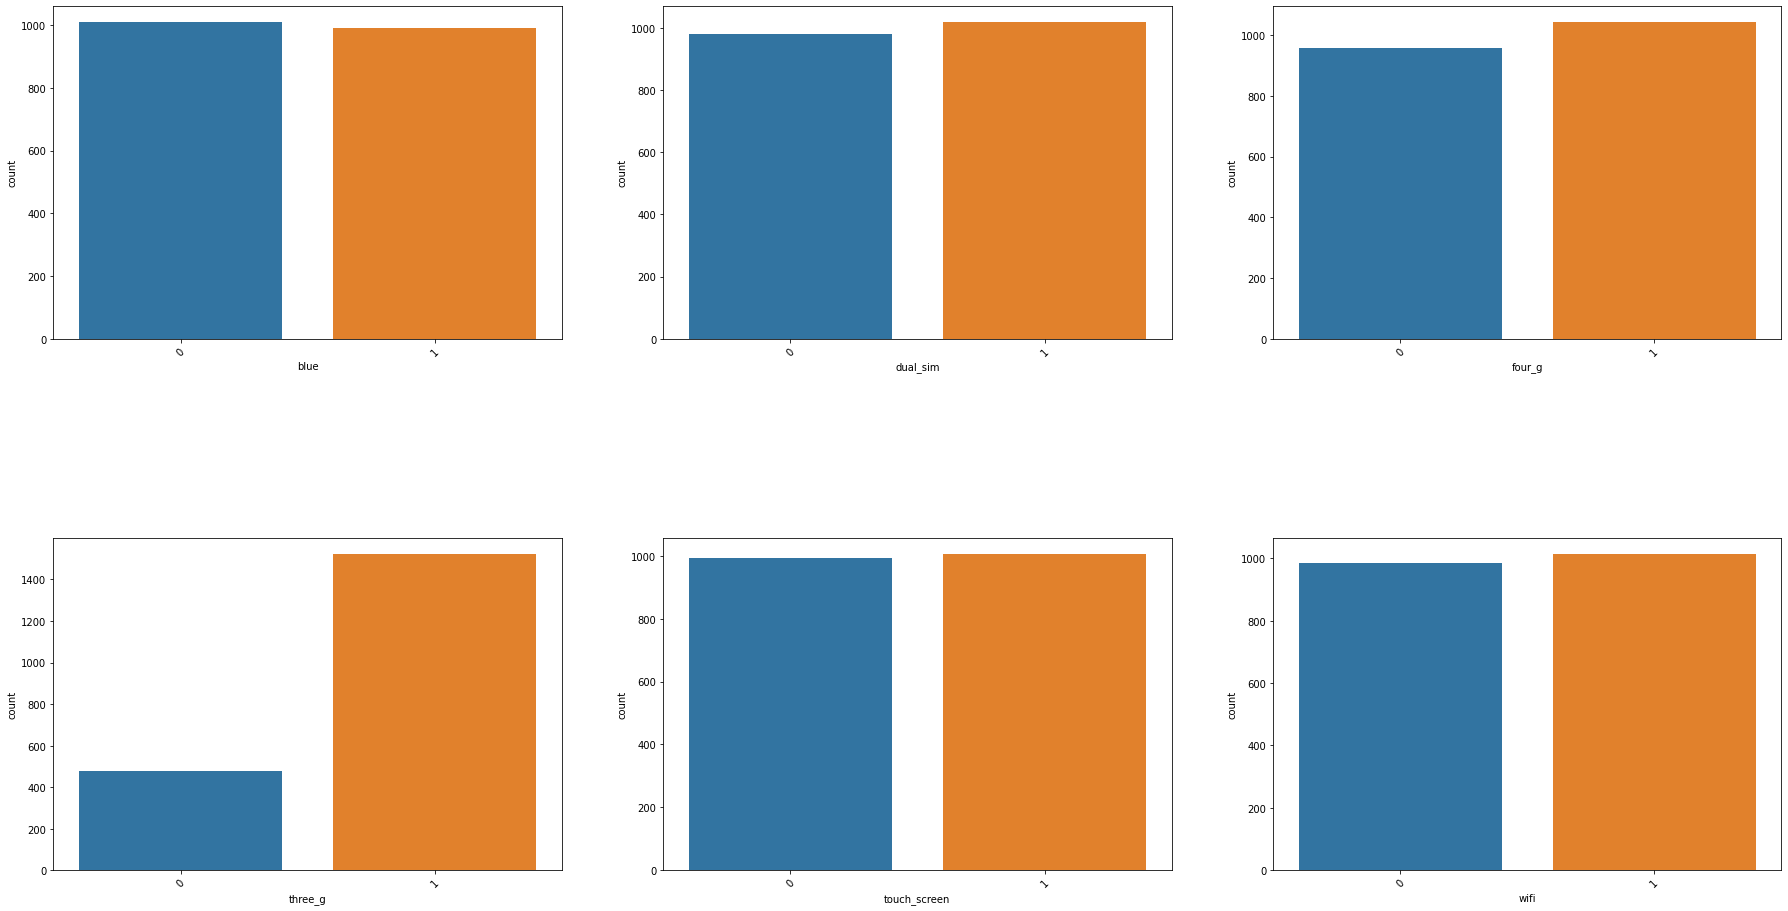

In [10]:
#plotting the count plots using sns
def count_plots(df, categorical_features):
    fig, ax = plt.subplots(2,3, figsize = (30,15))
   
    for i,feature in enumerate(categorical_features):
        sns.countplot(df[feature], ax=ax[i//3,i%3])
        ax[i//3, i%3].tick_params(axis='x', rotation=45)
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.6)
    plt.show()
    
count_plots(csv, categorical_features)

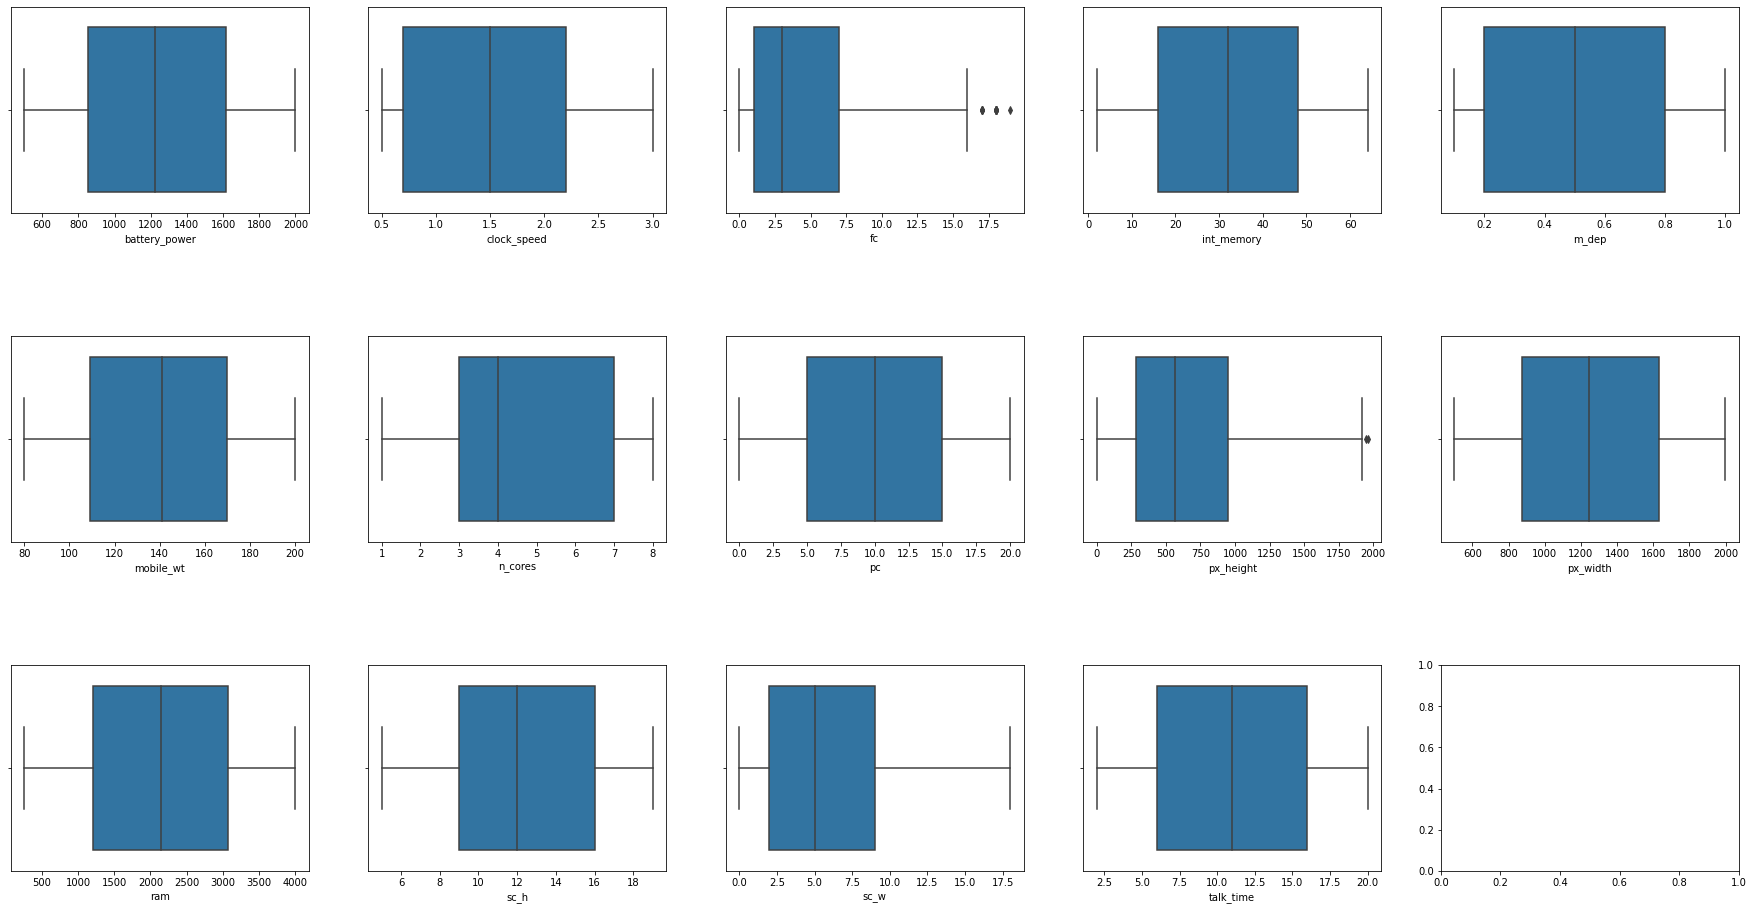

In [11]:
#plotting the boxplots using sns
def dist_plots(df, continuous_features):
    fig, ax = plt.subplots(3,5, figsize = (30,15))
    for i,feature in enumerate(continuous_features):
        sns.boxplot(df[feature], ax=ax[i//5,i%5])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.6)
    plt.show()
    
dist_plots(csv, continuous_features)

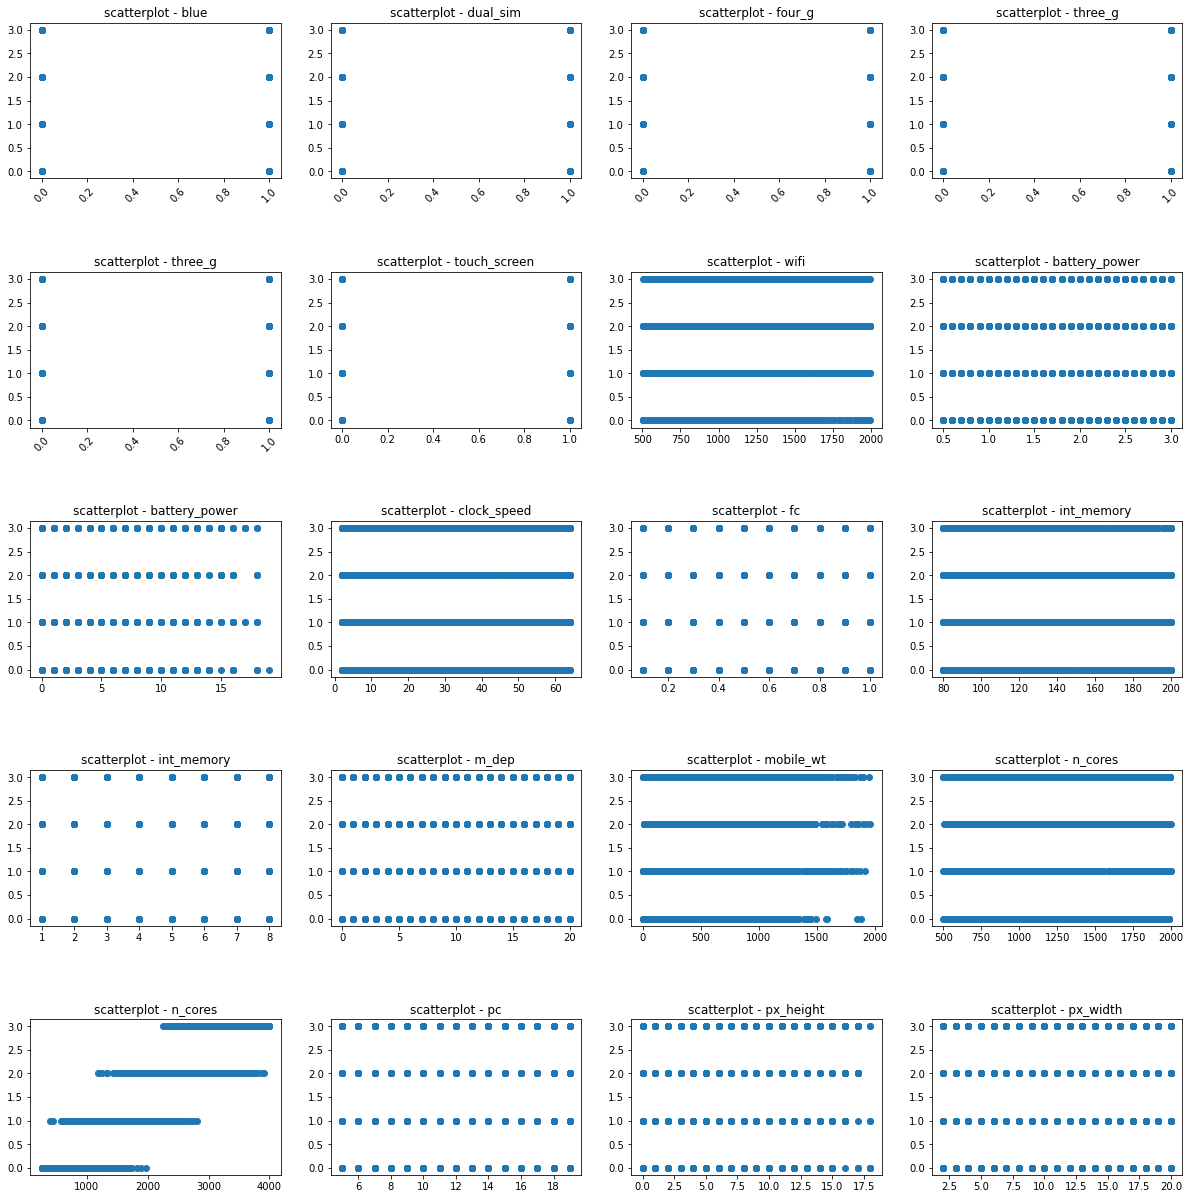

In [12]:

def scatter_plots(df, features):
    fig, ax = plt.subplots(5,4, figsize=(20,20))
    for i in range(5):
        for j in range(4):
            ax[i][j].scatter(df[features[4*i+j]], df["price_range"])
            ax[i][j].set_title("scatterplot - "+features[3*i+j])
            ax[i//4, i%4].tick_params(axis='x', rotation=45)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.6)
    plt.show()
scatter_plots(csv, features)

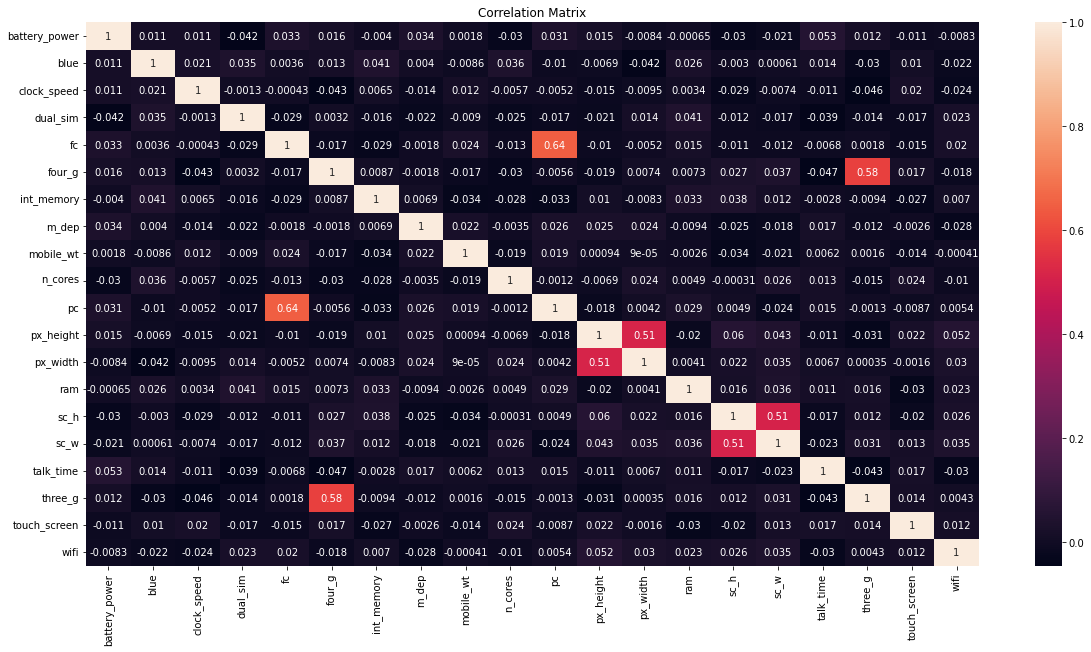

In [13]:

correlation = csv.iloc[:,:-1].corr()
plt.figure(figsize = (20, 10))
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matrix")
plt.show()

# Data preparation for fitting models

In [14]:
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix

In [15]:
encoder = LabelEncoder()
cat_dims = {}
for feature in categorical_features:
    csv[feature] = encoder.fit_transform(csv[feature])
    cat_dims[feature] = len(encoder.classes_)
csv["price_range"] = encoder.fit_transform(csv["price_range"])
print(cat_dims)

X = csv.drop(columns=["price_range"])
y = csv.price_range


features_ = list(csv.columns)
cat_idxs = [ i for i, f in enumerate(features_) if f in categorical_features]
cat_dims = [ cat_dims[f] for i, f in enumerate(features_) if f in categorical_features]
# define your embedding sizes : here just a random choice
cat_emb_dim = [10 for i in range(len(cat_dims))]

y = encoder.fit_transform(y)
    
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 42)
print(X_train.shape[0], X_val.shape[0])

{'blue': 2, 'dual_sim': 2, 'four_g': 2, 'three_g': 2, 'touch_screen': 2, 'wifi': 2}
1600 400


# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(random_state = 42)
clf.fit(X_train,y_train)
y_pred=clf.predict_proba(X_val)
prf = precision_recall_fscore_support(y_val, y_pred.argmax(-1))
print("accuracy : ", accuracy_score(y_val, y_pred.argmax(-1)))

print("precision : ", prf[0])
print("recall : ", prf[1])
print("f1 : ", prf[2])
print("average precision: ", np.mean(prf[0]))
print("average recall: ", np.mean(prf[1]))
print("average f1 score: ", np.mean(prf[2]))

accuracy :  0.6
precision :  [0.85263158 0.51546392 0.40566038 0.64705882]
recall :  [0.81 0.5  0.43 0.66]
f1 :  [0.83076923 0.50761421 0.41747573 0.65346535]
average precision:  0.605203674340261
average recall:  0.6
average f1 score:  0.6023311296642984


# Decision Trees

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(criterion='gini',max_depth=100,random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict_proba(X_val)
prf = precision_recall_fscore_support(y_val, y_pred.argmax(-1))
print("accuracy : ", accuracy_score(y_val, y_pred.argmax(-1)))

print("precision : ", prf[0])
print("recall : ", prf[1])
print("f1 : ", prf[2])
print("average precision: ", np.mean(prf[0]))
print("average recall: ", np.mean(prf[1]))
print("average f1 score: ", np.mean(prf[2]))

accuracy :  0.83
precision :  [0.87619048 0.77894737 0.74766355 0.92473118]
recall :  [0.92 0.74 0.8  0.86]
f1 :  [0.89756098 0.75897436 0.77294686 0.89119171]
average precision:  0.8318831447022742
average recall:  0.83
average f1 score:  0.830168476083014


# Random Forests

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(criterion='gini',max_depth=100,random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict_proba(X_val)
prf = precision_recall_fscore_support(y_val, y_pred.argmax(-1))
print("accuracy : ", accuracy_score(y_val, y_pred.argmax(-1)))

print("precision : ", prf[0])
print("recall : ", prf[1])
print("f1 : ", prf[2])

print("average precision: ", np.mean(prf[0]))
print("average recall: ", np.mean(prf[1]))
print("average f1 score: ", np.mean(prf[2]))

accuracy :  0.88
precision :  [0.95049505 0.82352941 0.81443299 0.93      ]
recall :  [0.96 0.84 0.79 0.93]
f1 :  [0.95522388 0.83168317 0.80203046 0.93      ]
average precision:  0.8796143627400945
average recall:  0.88
average f1 score:  0.8797343764416596


# Tabnet

In [19]:
#install tabnet
!pip install pytorch-tabnet

In [20]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.metrics import Metric
import torch
from torch.nn import functional as F
class changed_acc(Metric):
    def __init__(self):
        self._name = "changed_acc"
        self._maximize = True

    def __call__(self, y_true, y_score):
        acc = accuracy_score(y_true, y_score.argmax(-1))
        return acc
#training tabnet
def loss_fn(y_pred, y_true):
    one_hots = F.one_hot(y_true, num_classes=4)
    y_pred = F.softmax(y_pred, dim = -1)
    #y_pred = torch.clip(y_pred, 1e-10, 1-1e-10)
    #print(one_hots, y_pred)
    loss = -2*((1-y_pred)**2)*one_hots*torch.log(y_pred)
    return loss.sum(-1).mean()
# TabNetPretrainer

In [21]:

unsupervised_model = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax' # "sparsemax"
)

unsupervised_model.fit(
    X_train=X_train.values,
    eval_set=[X_val.values],
    pretraining_ratio=0.8,
    max_epochs = 500
)


Device used : cpu
epoch 0  | loss: 7.49544 | val_0_unsup_loss: 526.71448|  0:00:00s
epoch 1  | loss: 5.53214 | val_0_unsup_loss: 107.27139|  0:00:00s
epoch 2  | loss: 4.85654 | val_0_unsup_loss: 32.93155|  0:00:00s
epoch 3  | loss: 4.49692 | val_0_unsup_loss: 13.89191|  0:00:00s
epoch 4  | loss: 4.26912 | val_0_unsup_loss: 9.17838 |  0:00:01s
epoch 5  | loss: 4.22048 | val_0_unsup_loss: 8.54777 |  0:00:01s
epoch 6  | loss: 4.13144 | val_0_unsup_loss: 7.22581 |  0:00:01s
epoch 7  | loss: 4.05488 | val_0_unsup_loss: 6.73282 |  0:00:01s
epoch 8  | loss: 3.98821 | val_0_unsup_loss: 6.39665 |  0:00:01s
epoch 9  | loss: 3.91018 | val_0_unsup_loss: 5.7359  |  0:00:01s
epoch 10 | loss: 3.83575 | val_0_unsup_loss: 5.34281 |  0:00:02s
epoch 11 | loss: 3.80003 | val_0_unsup_loss: 5.03674 |  0:00:02s
epoch 12 | loss: 3.73173 | val_0_unsup_loss: 4.77037 |  0:00:02s
epoch 13 | loss: 3.65568 | val_0_unsup_loss: 4.54335 |  0:00:02s
epoch 14 | loss: 3.5867  | val_0_unsup_loss: 4.33421 |  0:00:02s
epoch

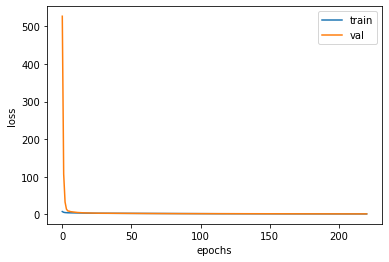

In [22]:
plt.plot(unsupervised_model.history['loss'])
plt.plot(unsupervised_model.history['val_0_unsup_loss'])
plt.legend(["train", "val"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [23]:
clf = TabNetClassifier(
    cat_dims=cat_dims, cat_emb_dim=cat_emb_dim, cat_idxs=cat_idxs,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=5e-2),
    scheduler_params={"step_size":10, # how to use learning rate scheduler
                      "gamma":0.5},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='sparsemax' # This will be overwritten if using pretrain model
)

clf.fit(
    X_train=X_train.values, y_train=y_train,
    eval_set=[(X_train.values, y_train), (X_val.values, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=[changed_acc],
    loss_fn = loss_fn,
    from_unsupervised=unsupervised_model,
    patience = 80,
    max_epochs = 1000
)

Device used : cpu
Loading weights from unsupervised pretraining
epoch 0  | loss: 29.67284| train_changed_acc: 0.255   | valid_changed_acc: 0.26    |  0:00:00s
epoch 1  | loss: 12.40616| train_changed_acc: 0.2     | valid_changed_acc: 0.2025  |  0:00:00s
epoch 2  | loss: 7.34743 | train_changed_acc: 0.26062 | valid_changed_acc: 0.2325  |  0:00:00s
epoch 3  | loss: 5.9376  | train_changed_acc: 0.25188 | valid_changed_acc: 0.2625  |  0:00:00s
epoch 4  | loss: 3.1738  | train_changed_acc: 0.26438 | valid_changed_acc: 0.265   |  0:00:00s
epoch 5  | loss: 1.84253 | train_changed_acc: 0.27688 | valid_changed_acc: 0.2625  |  0:00:01s
epoch 6  | loss: 1.33003 | train_changed_acc: 0.24438 | valid_changed_acc: 0.245   |  0:00:01s
epoch 7  | loss: 1.00262 | train_changed_acc: 0.24375 | valid_changed_acc: 0.2425  |  0:00:01s
epoch 8  | loss: 0.86157 | train_changed_acc: 0.27187 | valid_changed_acc: 0.2825  |  0:00:01s
epoch 9  | loss: 0.62298 | train_changed_acc: 0.3125  | valid_changed_acc: 0.2975

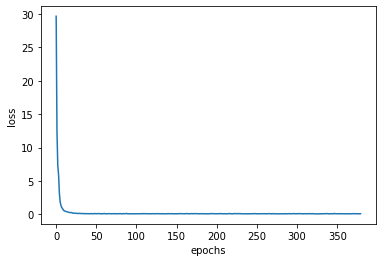

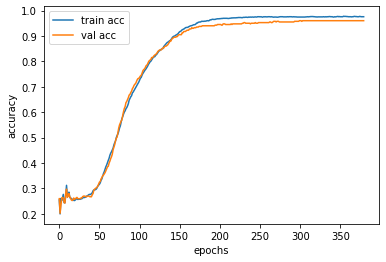

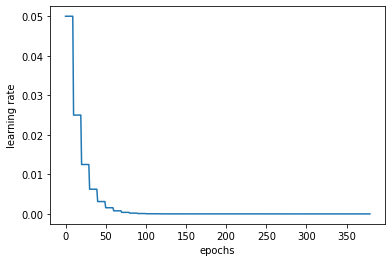

In [24]:
plt.plot(clf.history['loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()
# plot auc
plt.plot(clf.history['train_changed_acc'])
plt.plot(clf.history['valid_changed_acc'])
plt.legend(["train acc", "val acc"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

# plot learning rates
plt.plot(clf.history['lr'])
plt.xlabel("epochs")
plt.ylabel("learning rate")
plt.show()

In [25]:
y_pred = clf.predict_proba(X_val.values)
prf = precision_recall_fscore_support(y_val, y_pred.argmax(-1))
print("accuracy : ", accuracy_score(y_val, y_pred.argmax(-1)))

print("precision : ", prf[0])
print("recall : ", prf[1])

print("f1 : ", prf[2])

print("average precision: ", np.mean(prf[0]))
print("average recall: ", np.mean(prf[1]))
print("average f1 score: ", np.mean(prf[2]))

accuracy :  0.96
precision :  [0.97959184 0.92079208 0.95       0.99009901]
recall :  [0.96 0.93 0.95 1.  ]
f1 :  [0.96969697 0.92537313 0.95       0.99502488]
average precision:  0.9601207314609013
average recall:  0.96
average f1 score:  0.9600237449118046
